<a href="https://colab.research.google.com/github/Swapnil-417/Bike-Sharing-Demand-Prediction/blob/main/Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all the required libraries that we will be using.

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# importing the dataset
directory_path = "/content/drive/MyDrive/Capstone Projects/Bike Sharing Demand Prediction – Swapnil Patil/Data/"
bike_df = pd.read_csv(directory_path + "SeoulBikeData.csv", encoding= 'unicode_escape')

# **Getting to Know about Data**

At the very first, we will start understanding the data.

In [ ]:
# first look
bike_df.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

In [ ]:
bike_df.tail()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
8755  30/11/2018               1003    19  ...   Autumn  No Holiday              Yes
8756  30/11/2018                764    20  ...   Autumn  No Holiday              Yes
8757  30/11/2018                694    21  ...   Autumn  No Holiday              Yes
8758  30/11/2018                712    22  ...   Autumn  No Holiday              Yes
8759  30/11/2018                584    23  ...   Autumn  No Holiday              Yes

[5 rows x 14 columns]

This dataset contains the data of rented bike count in the city of seoul. It presents the count of bikes rented per hour and the weather conditions for the day. The data is of one year from December 2017 to November 2018.

In [ ]:
bike_df.shape

(8760, 14)

In [ ]:
bike_df.columns= map(str.lower, bike_df.columns)
bike_df.columns

Index(['date', 'rented bike count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind speed (m/s)', 'visibility (10m)', 'dew point temperature(°c)',
       'solar radiation (mj/m2)', 'rainfall(mm)', 'snowfall (cm)', 'seasons',
       'holiday', 'functioning day'],
      dtype='object')

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8760 non-null   object 
 1   rented bike count          8760 non-null   int64  
 2   hour                       8760 non-null   int64  
 3   temperature(°c)            8760 non-null   float64
 4   humidity(%)                8760 non-null   int64  
 5   wind speed (m/s)           8760 non-null   float64
 6   visibility (10m)           8760 non-null   int64  
 7   dew point temperature(°c)  8760 non-null   float64
 8   solar radiation (mj/m2)    8760 non-null   float64
 9   rainfall(mm)               8760 non-null   float64
 10  snowfall (cm)              8760 non-null   float64
 11  seasons                    8760 non-null   object 
 12  holiday                    8760 non-null   object 
 13  functioning day            8760 non-null   objec

In this Dataset, we have 8760 rows and 14 columns from which "rented bike count" is our target variable. There are numerical variables as well as categorical variables and one date variable which is stored as object so we will need to convert its dtype.

In [ ]:
# converting dtype of date column
def get_date(date_str):
  date_obj= dt.datetime.strptime(date_str, '%d/%m/%Y')
  date_obj= pd.to_datetime(date_obj.date(), format="%Y-%m-%d")
  return date_obj

bike_df['date'] = bike_df['date'].apply(get_date)

In [ ]:
# extracting date, month and day of week
bike_df['day'] = bike_df['date'].apply(lambda x : x.day)
bike_df['month'] = bike_df['date'].apply(lambda x : x.month)
bike_df['day_of_week'] = bike_df['date'].dt.day_name()

bike_df= bike_df.drop("date", axis= 1)

In [ ]:
bike_df.head()

rented bike count  hour  temperature(°c)  ...  day  month  day_of_week
0                254     0             -5.2  ...    1     12       Friday
1                204     1             -5.5  ...    1     12       Friday
2                173     2             -6.0  ...    1     12       Friday
3                107     3             -6.2  ...    1     12       Friday
4                 78     4             -6.0  ...    1     12       Friday

[5 rows x 16 columns]

In [ ]:
# checking for duplicate values
bike_df.duplicated().sum()

0

In [ ]:
# checking for missing values
bike_df.isnull().sum()

rented bike count            0
hour                         0
temperature(°c)              0
humidity(%)                  0
wind speed (m/s)             0
visibility (10m)             0
dew point temperature(°c)    0
solar radiation (mj/m2)      0
rainfall(mm)                 0
snowfall (cm)                0
seasons                      0
holiday                      0
functioning day              0
day                          0
month                        0
day_of_week                  0
dtype: int64

Above we can see there are no missing values as well as no duplicate values in the dataset.

In [ ]:
bike_df.describe(include='all')

rented bike count         hour  ...        month  day_of_week
count         8760.000000  8760.000000  ...  8760.000000         8760
unique                NaN          NaN  ...          NaN            7
top                   NaN          NaN  ...          NaN       Friday
freq                  NaN          NaN  ...          NaN         1272
mean           704.602055    11.500000  ...     6.526027          NaN
std            644.997468     6.922582  ...     3.448048          NaN
min              0.000000     0.000000  ...     1.000000          NaN
25%            191.000000     5.750000  ...     4.000000          NaN
50%            504.500000    11.500000  ...     7.000000          NaN
75%           1065.250000    17.250000  ...    10.000000          NaN
max           3556.000000    23.000000  ...    12.000000          NaN

[11 rows x 16 columns]

# **Exploratory Data Analysis**

## **Univariate Analysis**

### **Dependent Variable**

First we will start with analyzing our target variable which is **rented bike count**.

In [ ]:
# dependent variable "rented bike count"
dependent_var= "rented bike count"

In [ ]:
bike_df[dependent_var].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: rented bike count, dtype: float64

In [ ]:
bike_df[dependent_var].value_counts()

0       295
122      19
223      19
262      19
103      18
       ... 
2379      1
1589      1
1597      1
1605      1
2047      1
Name: rented bike count, Length: 2166, dtype: int64

Now let's see the distribution of our dependent variable 'rented bike count'

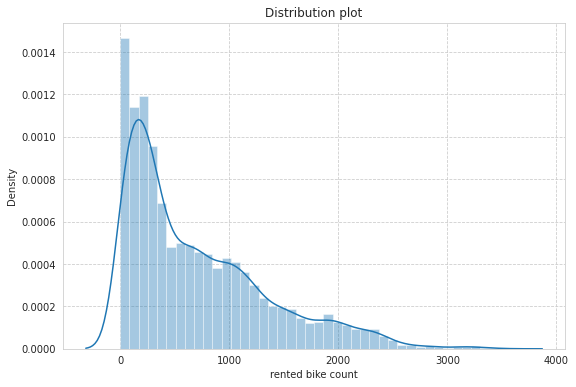

In [ ]:
# distribution plot
plt.figure(figsize=(9,6))
sns.distplot(bike_df[dependent_var])
plt.title("Distribution plot");

Dependent variable i.e rented bike count is slightly skewed towards right side (positively skewed). So we will apply transformation and again look at the distribution.

Below are some transformation technique to reduce skewness.

<b>square-root for moderate skew:</b>
sqrt(x) for positively skewed data,
sqrt(max(x+1) - x) for negatively skewed data

<b>log for greater skew:</b>
log10(x) for positively skewed data,
log10(max(x+1) - x) for negatively skewed data

<b>inverse for severe skew:</b>
1/x for positively skewed data
1/(max(x+1) - x) for negatively skewed data


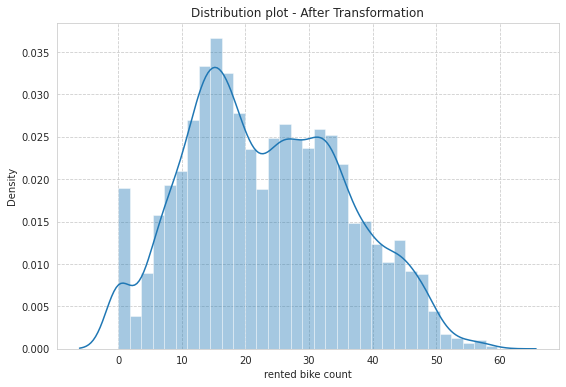

In [ ]:
# applying square-root transformation
plt.figure(figsize=(9,6))
sns.distplot(np.sqrt(bike_df[dependent_var]))
plt.title("Distribution plot - After Transformation");

It looks good and almost near to normal distribution.



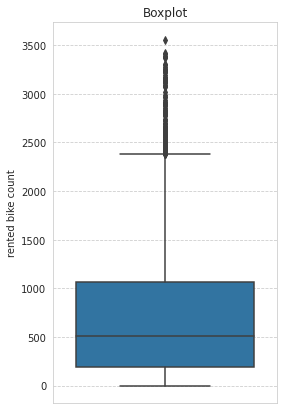

In [ ]:
# boxplot 
plt.figure(figsize=(4,7))
sns.boxplot(y= bike_df[dependent_var])
plt.title("Boxplot");

From boxplot, we can see the median value of rented bike count is near 500 and there are some outliers towards upper limit. After applying transformation there will be no outliers.

### **Independent Variables**

### **Numerical Variables**

Now let's have a look at our numerical features and plot some graphs to understand them.

In [ ]:
# numerical variables
num_variables= list(bike_df.describe().columns[1:])

In [ ]:
num_variables

['hour',
 'temperature(°c)',
 'humidity(%)',
 'wind speed (m/s)',
 'visibility (10m)',
 'dew point temperature(°c)',
 'solar radiation (mj/m2)',
 'rainfall(mm)',
 'snowfall (cm)',
 'day',
 'month']

In [ ]:
bike_df[num_variables].describe().T

count         mean  ...      75%      max
hour                       8760.0    11.500000  ...    17.25    23.00
temperature(°c)            8760.0    12.882922  ...    22.50    39.40
humidity(%)                8760.0    58.226256  ...    74.00    98.00
wind speed (m/s)           8760.0     1.724909  ...     2.30     7.40
visibility (10m)           8760.0  1436.825799  ...  2000.00  2000.00
dew point temperature(°c)  8760.0     4.073813  ...    14.80    27.20
solar radiation (mj/m2)    8760.0     0.569111  ...     0.93     3.52
rainfall(mm)               8760.0     0.148687  ...     0.00    35.00
snowfall (cm)              8760.0     0.075068  ...     0.00     8.80
day                        8760.0    15.720548  ...    23.00    31.00
month                      8760.0     6.526027  ...    10.00    12.00

[11 rows x 8 columns]

In [ ]:
# unique count of numerical variables
lst= []
for col in num_variables:
  lst.append(bike_df[col].nunique())

unique_cnt_df= pd.DataFrame(index= num_variables, columns=['unique_count'])
unique_cnt_df['unique_count']= lst
unique_cnt_df

unique_count
hour                                 24
temperature(°c)                     546
humidity(%)                          90
wind speed (m/s)                     65
visibility (10m)                   1789
dew point temperature(°c)           556
solar radiation (mj/m2)             345
rainfall(mm)                         61
snowfall (cm)                        51
day                                  31
month                                12

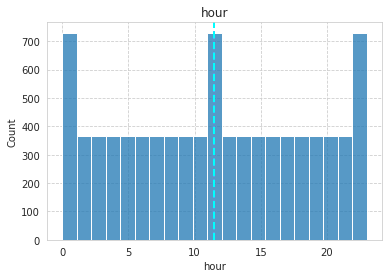

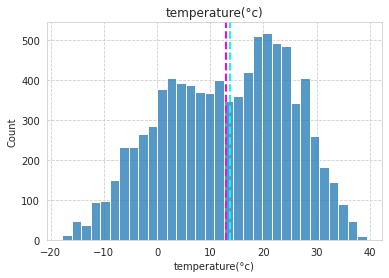

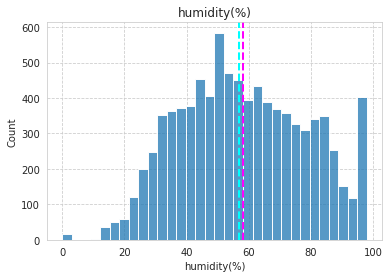

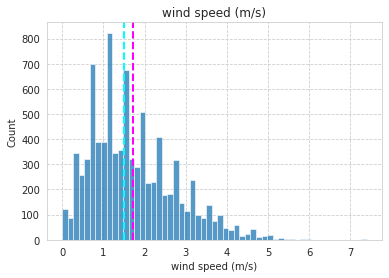

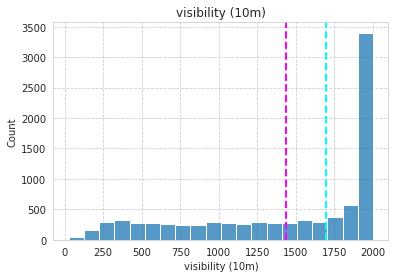

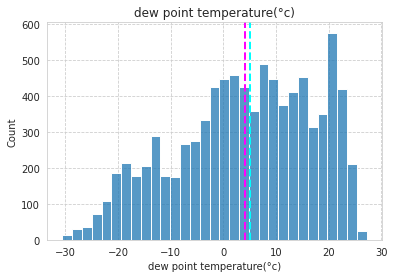

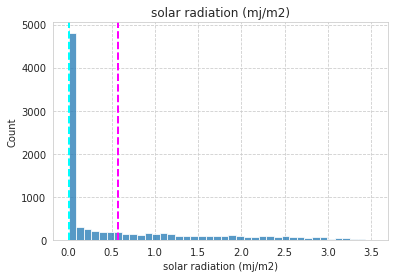

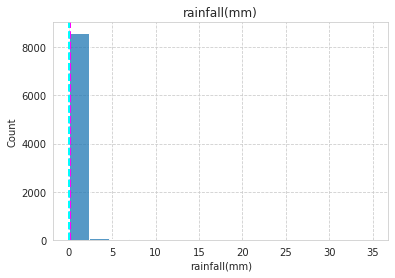

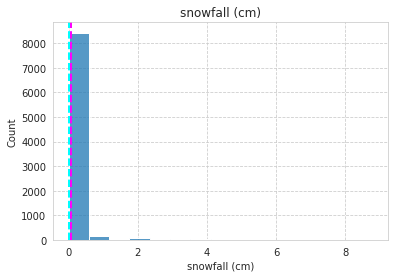

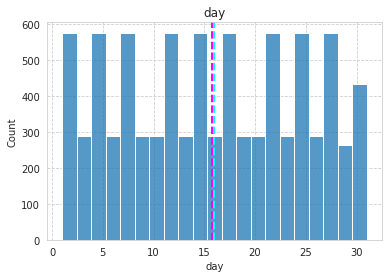

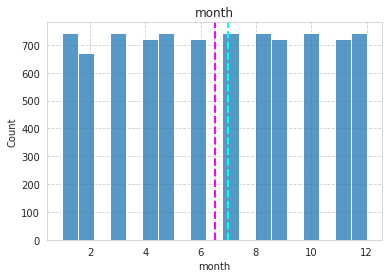

In [ ]:
# histogram for each numerical feature count
for col in num_variables:
    feature = bike_df[col]
    sns.histplot(feature)
    plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
    plt.show()

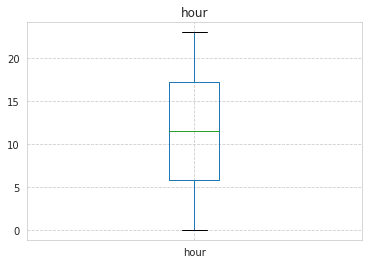

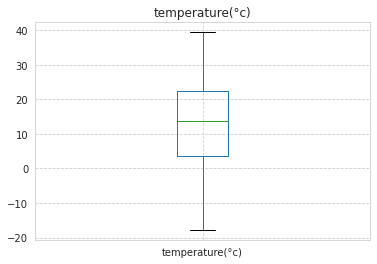

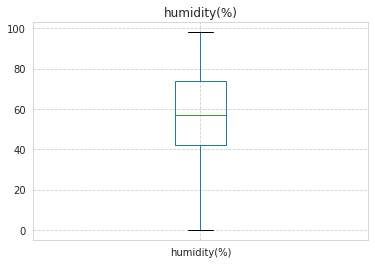

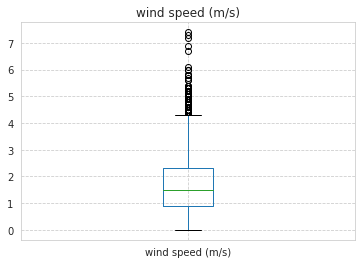

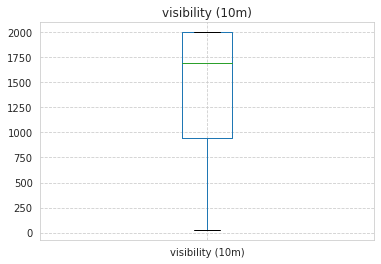

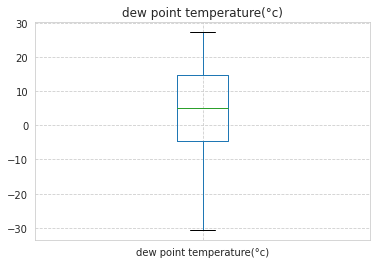

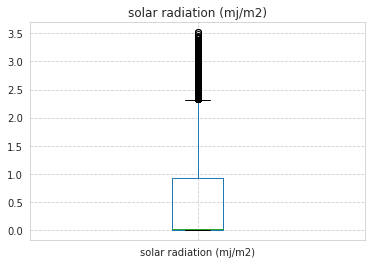

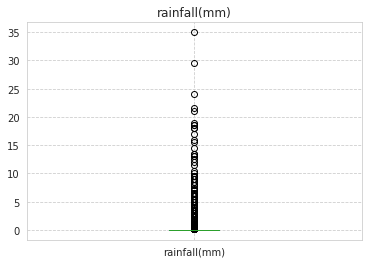

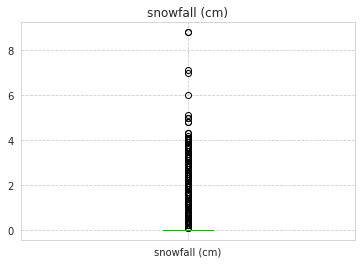

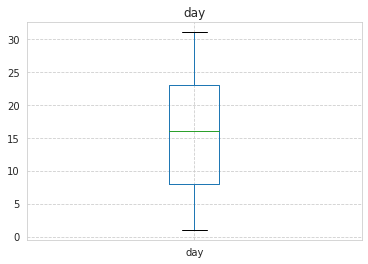

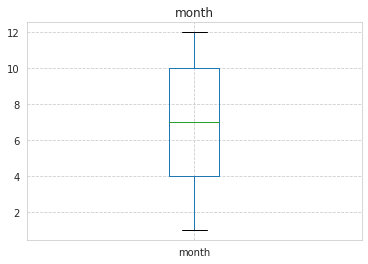

In [ ]:
# boxplot for each numerical feature  
for col in num_variables:
    fig = plt.figure()
    ax = fig.gca()
    bike_df.boxplot(col, ax= ax)
    ax.set_title(col)
plt.show()

Variables such as wind speed (m/s), solar radiation (mj/m2), rainfall(mm), snowfall (cm) has outliers as seen in the boxplot.

### **Categorical Variables**

In [ ]:
cat_variables= bike_df.select_dtypes(include='object')

Look at the different values of distinct categories in our variables.

In [ ]:
# Seasons column
print(f"Count of distinct categories in season variable: {bike_df['seasons'].nunique()}")
print(list(bike_df["seasons"].unique()))

Count of distinct categories in season variable: 4
['Winter', 'Spring', 'Summer', 'Autumn']


In [ ]:
# holiday column
print(f"Count of distinct categories in holiday variable: {bike_df['holiday'].nunique()}")
print(list(bike_df["holiday"].unique()))

Count of distinct categories in holiday variable: 2
['No Holiday', 'Holiday']


In [ ]:
# functioning day column
print(f"Count of distinct categories in functioning day variable: {bike_df['functioning day'].nunique()}")
print(list(bike_df["functioning day"].unique()))

Count of distinct categories in functioning day variable: 2
['Yes', 'No']


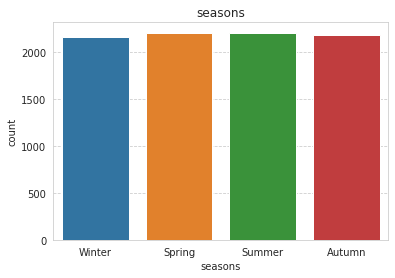

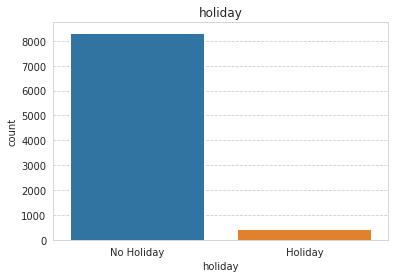

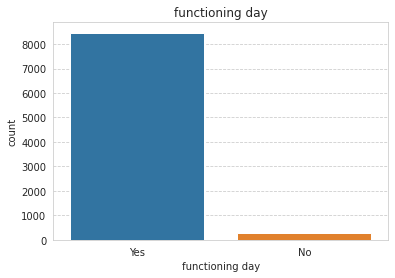

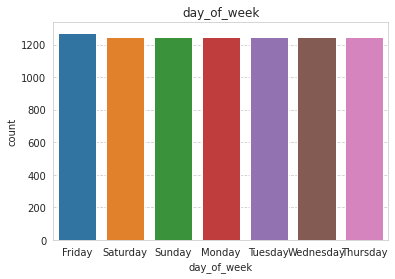

In [ ]:
# count plot
for col in cat_variables:
  # plt.figure(figsize=(9,6))
  sns.countplot(data = bike_df, x = col)
  plt.title(col)
  plt.show()

There are very less count of Holiday and No functioning day. We can say that this columns will not have a greater impact.

## **Bivariate Analysis**


### Numerical variables v/s rented bike count

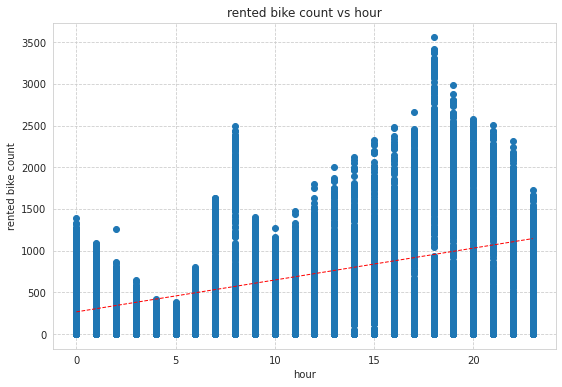

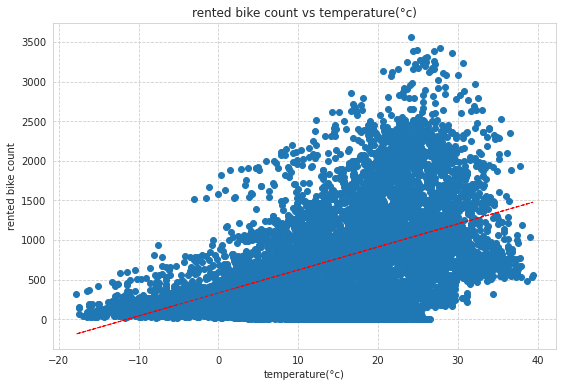

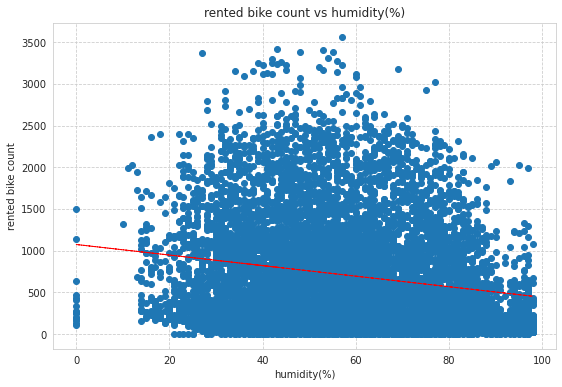

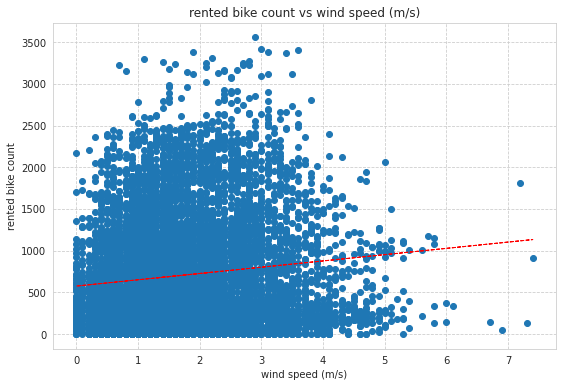

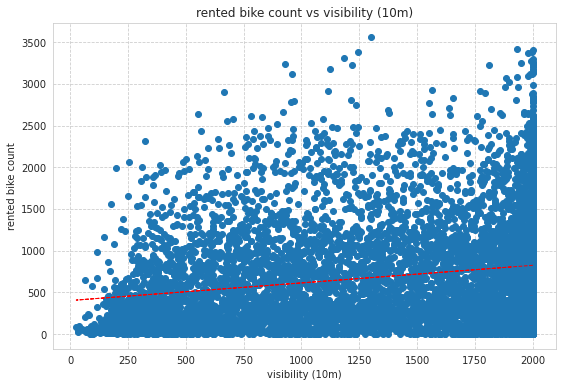

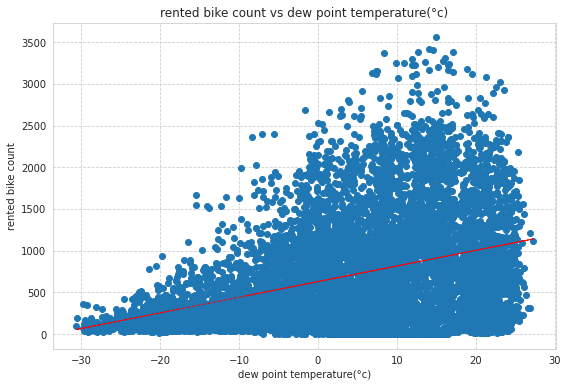

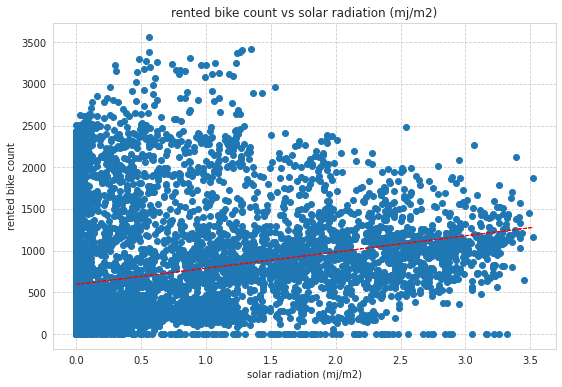

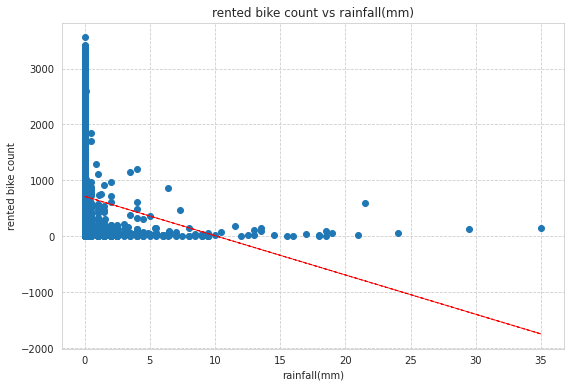

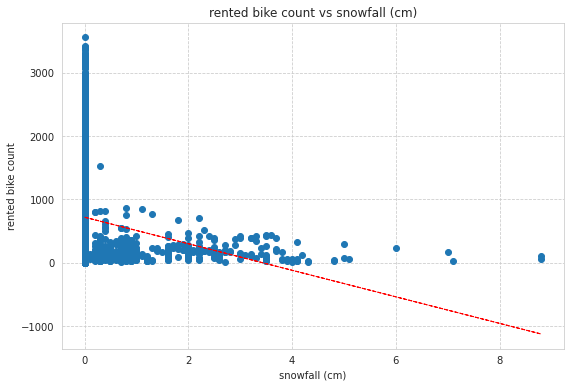

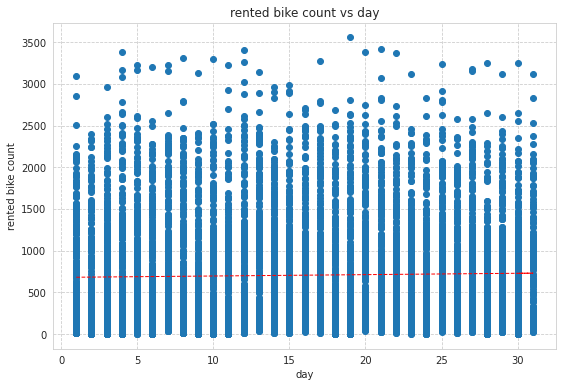

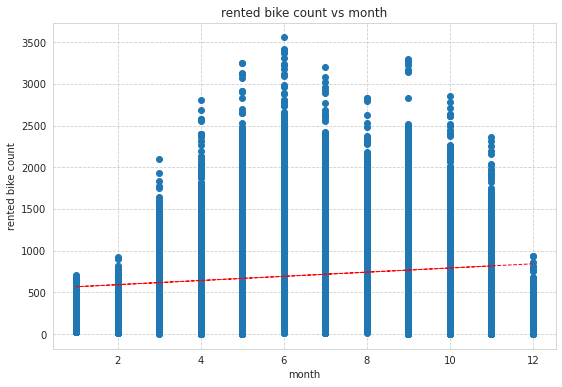

In [ ]:
# scatterplot numerical_var v/s rented bike count
for col in num_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    label = bike_df['rented bike count']
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('rented bike count')
    ax.set_title('rented bike count vs ' + col)
    z = np.polyfit(bike_df[col], bike_df['rented bike count'], 1)
    y_hat = np.poly1d(z)(bike_df[col])

    plt.plot(bike_df[col], y_hat, "r--", lw=1)

plt.show()

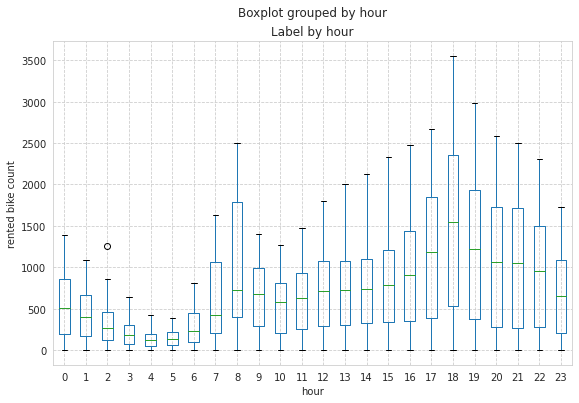

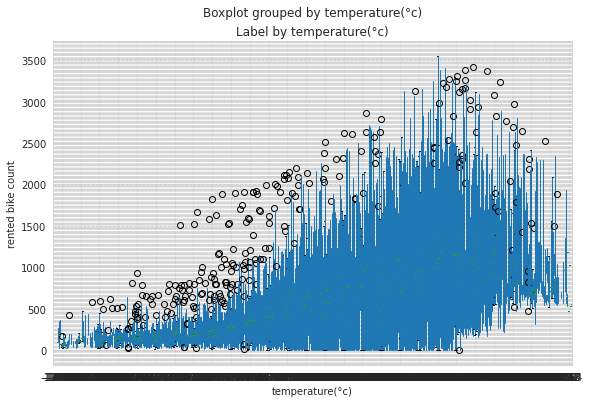

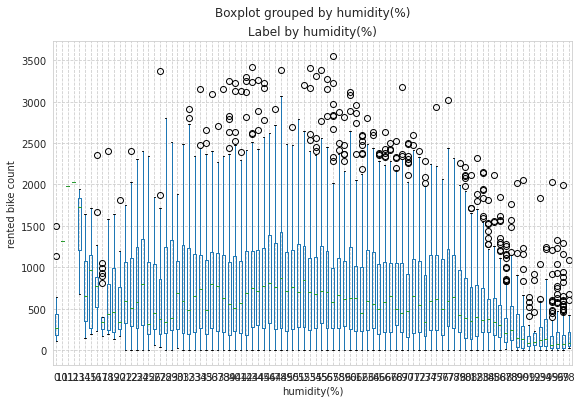

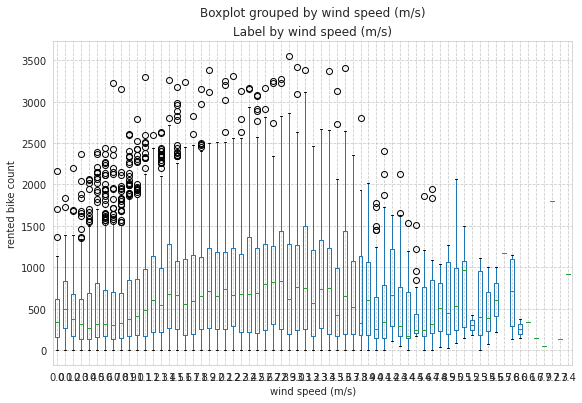

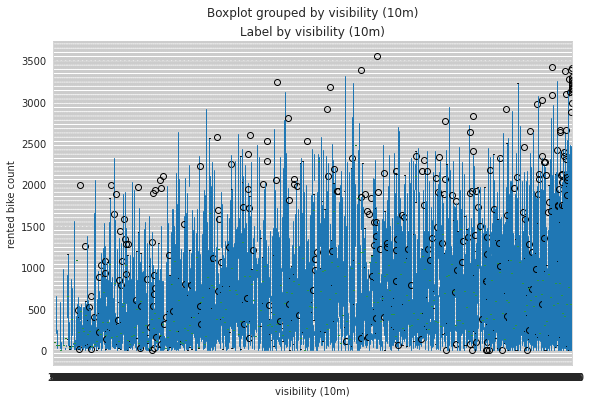

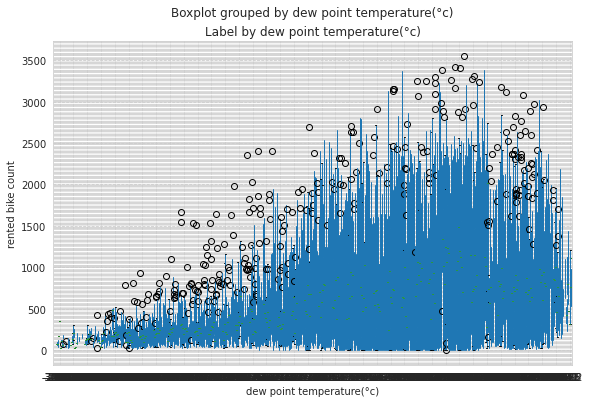

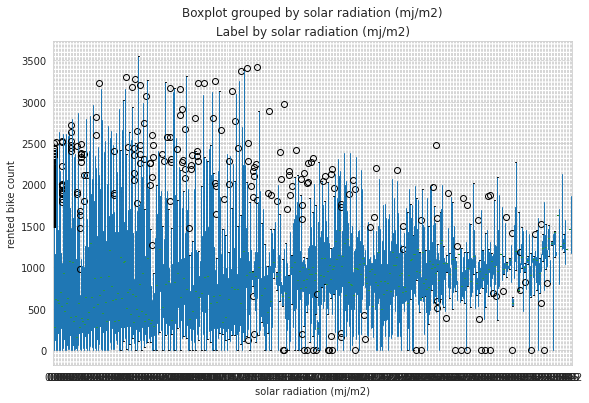

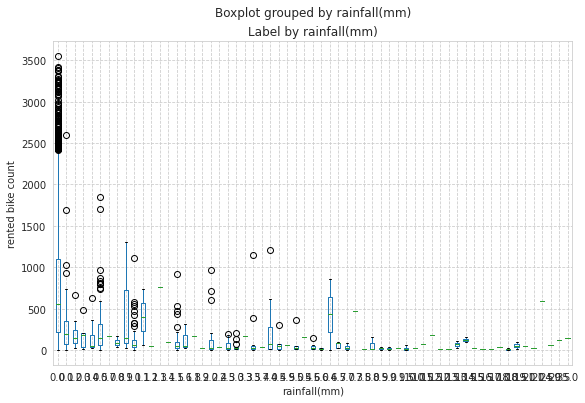

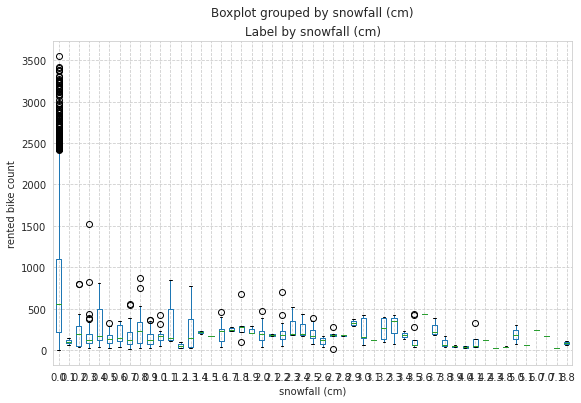

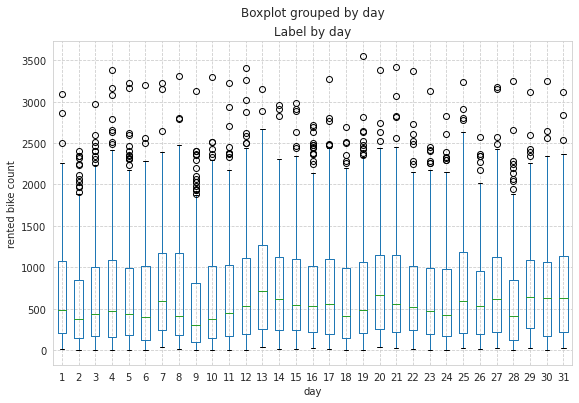

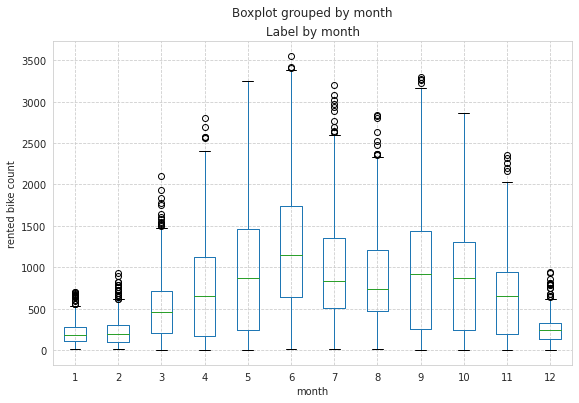

In [ ]:
# boxplot numerical_var v/s rented bike count
for col in num_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_df.boxplot(column = 'rented bike count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("rented bike count")
plt.show()

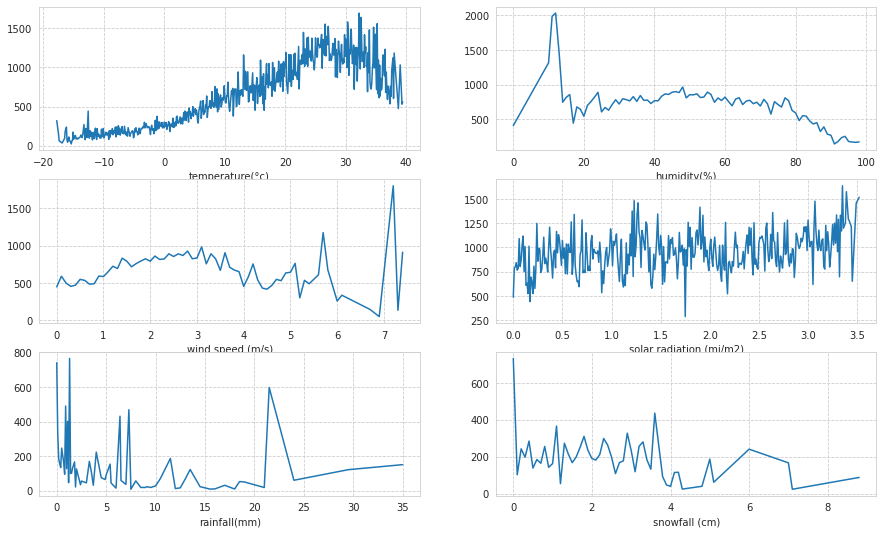

In [ ]:
# lineplot numerical_var v/s rented bike count
fig, ax = plt.subplots(3,2,figsize=(15,9))

bike_df.groupby('temperature(°c)').mean()['rented bike count'].plot(ax=ax[0][0])

bike_df.groupby('humidity(%)').mean()['rented bike count'].plot(ax=ax[0][1])

bike_df.groupby('wind speed (m/s)').mean()['rented bike count'].plot(ax=ax[1][0])

bike_df.groupby('solar radiation (mj/m2)').mean()['rented bike count'].plot(ax=ax[1][1])

bike_df.groupby('rainfall(mm)').mean()['rented bike count'].plot(ax=ax[2][0])

bike_df.groupby('snowfall (cm)').mean()['rented bike count'].plot(ax=ax[2][1])

plt.show()

* When the temperature is more the rental bike count is also high. 
* With increase in humidity the demand of rental bikes decreases. 
* Wind speed and solar radiation do not have much impact on the bike count. 
* When there is more than 10mm rainfall the demand of bike decreases but above 20mm of rain there is a huge peak. This could be the outlier or rainfall in the Summer.
* With increase in snowfall there is a decrease in rented bike count.

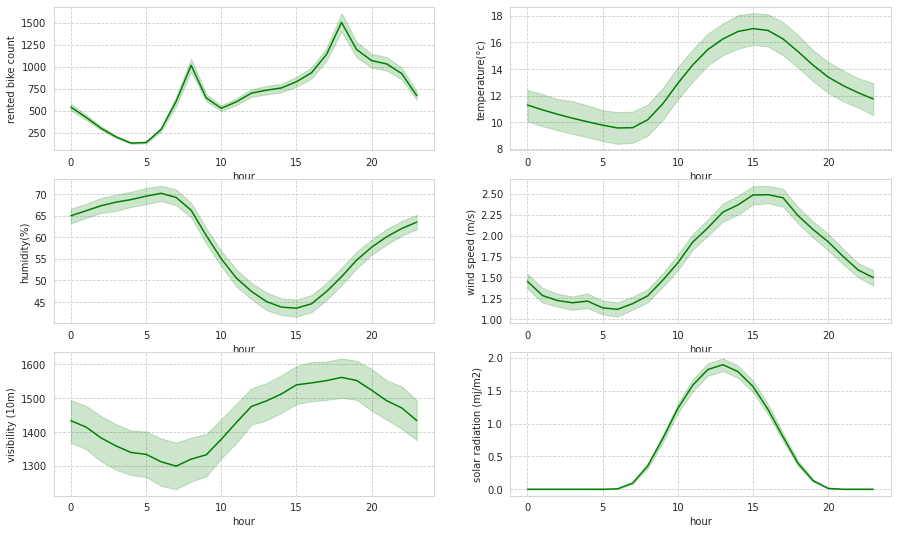

In [ ]:
# Analysis of numerical variables during hours
fig, ax = plt.subplots(3,2,figsize=(15,9))

sns.lineplot('hour', 'rented bike count', data=bike_df, color='g', ax=ax[0][0])

sns.lineplot('hour', 'temperature(°c)', data=bike_df, color='g', ax=ax[0][1])

sns.lineplot('hour', 'humidity(%)', data=bike_df, color='g', ax=ax[1][0])

sns.lineplot('hour', 'wind speed (m/s)', data=bike_df, color='g', ax=ax[1][1])

sns.lineplot('hour', 'visibility (10m)', data=bike_df, color='g', ax=ax[2][0])

sns.lineplot('hour', 'solar radiation (mj/m2)', data=bike_df, color='g', ax=ax[2][1])

plt.show()

* At the beginning of the day the demand of rental bike increases with the highest peak in the evening and later decreasing.
* The demand of rental bike is at peak at 8am and 6pm so we can say that demand is more during office opening and closing time.
* Temperature, wind speed, solar radiation also increases and are at the peak in afternoon.

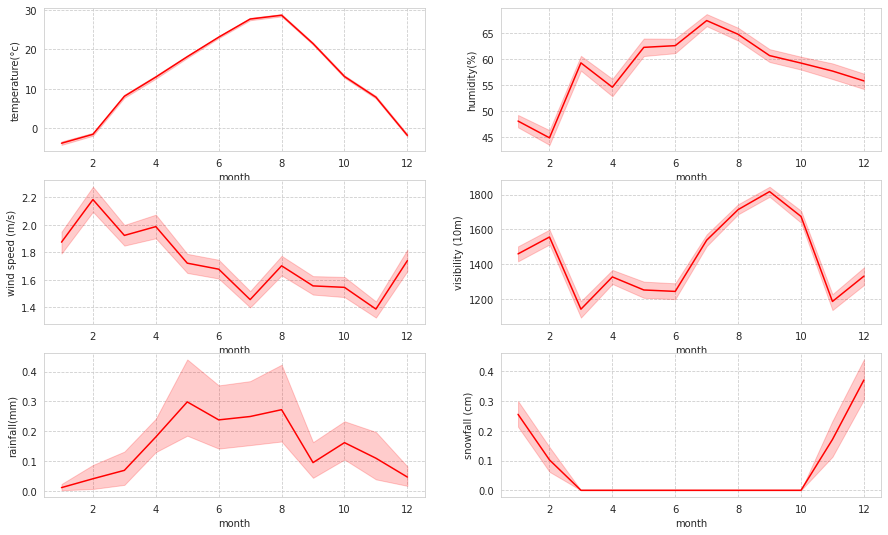

In [ ]:
# Spread of numerical variables across months
fig, ax = plt.subplots(3,2,figsize=(15,9))

sns.lineplot('month', 'temperature(°c)', data=bike_df, color='r', ax=ax[0][0])

sns.lineplot('month', 'humidity(%)', data=bike_df, color='r', ax=ax[0][1])

sns.lineplot('month', 'wind speed (m/s)', data=bike_df, color='r', ax=ax[1][0])

sns.lineplot('month', 'visibility (10m)', data=bike_df, color='r', ax=ax[1][1])

sns.lineplot('month', 'rainfall(mm)', data=bike_df, color='r', ax=ax[2][0])

sns.lineplot('month', 'snowfall (cm)', data=bike_df, color='r', ax=ax[2][1])

plt.show()

### Categorical Variables v/s rented bike count

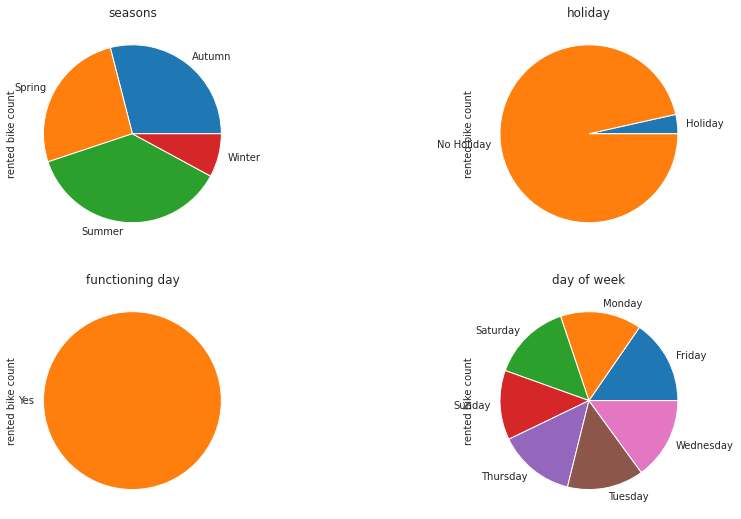

In [ ]:
# pie chart Categorical Variables v/s rented bike count
fig, ax = plt.subplots(2,2,figsize=(15,9))

bike_df.groupby('seasons').sum()['rented bike count'].plot.pie(ax= ax[0][0])
ax[0][0].set_title("seasons")

bike_df.groupby('holiday').sum()['rented bike count'].plot.pie(ax= ax[0][1])
ax[0][1].set_title("holiday")

bike_df.groupby('functioning day').sum()['rented bike count'].plot.pie(ax= ax[1][0])
ax[1][0].set_title("functioning day")

bike_df.groupby('day_of_week').sum()['rented bike count'].plot.pie(ax= ax[1][1])
ax[1][1].set_title("day of week")

plt.show()

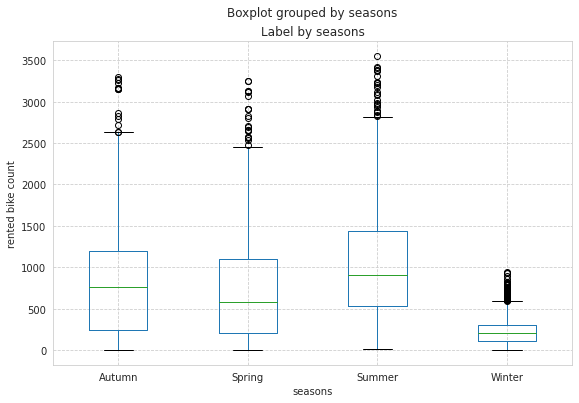

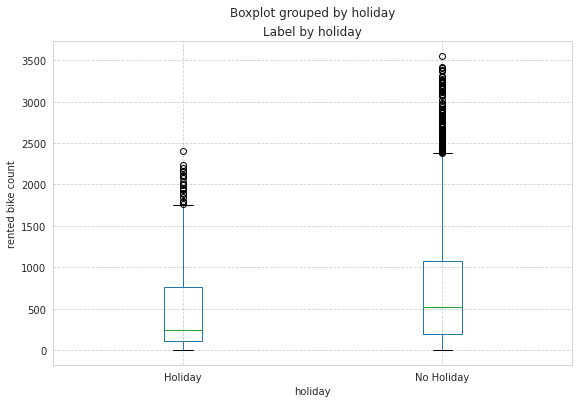

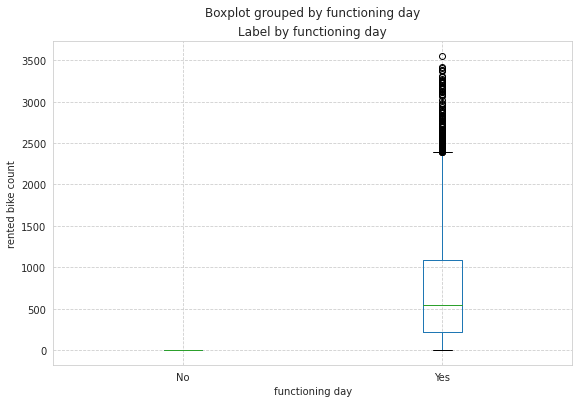

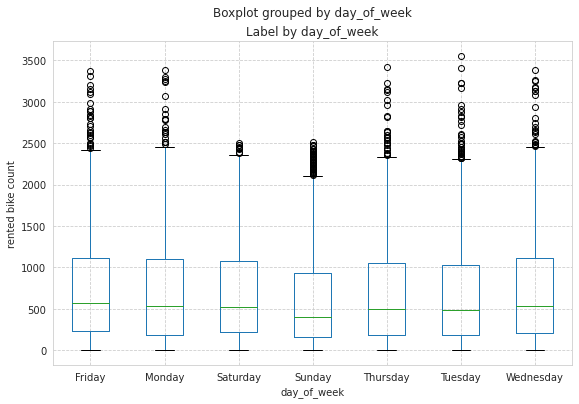

In [ ]:
# boxplot categorical_var v/s rented bike count
for col in cat_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_df.boxplot(column = 'rented bike count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("rented bike count")
plt.show()

* In Summer the demand of rented bike is high because temperature and solar radiation is high in summer. 
* We have seen there are less holidays so obviously rented bike count is also less on holidays. 
* Almost no demand on non functioning day.
* The demand of rental bikes slightly decreases on weekend days i.e saturday and sunday.

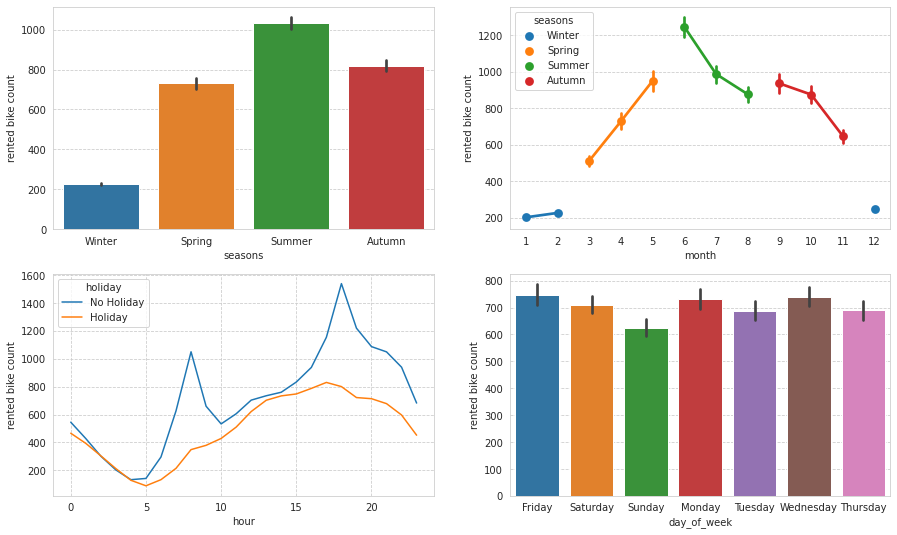

In [ ]:
# Analysis of rented bike count on hour, day and monthly basis
fig, ax = plt.subplots(2,2,figsize=(15,9))

sns.barplot(x= 'seasons', y= dependent_var, data= bike_df, ax= ax[0][0])

sns.pointplot(x= 'month', y= dependent_var, hue= 'seasons',
              data= bike_df, ax= ax[0][1])

sns.lineplot(x= 'hour', y= dependent_var, hue= 'holiday',
             ci=None, data= bike_df, ax= ax[1][0])

sns.barplot(x= 'day_of_week', y= dependent_var, data= bike_df, ax= ax[1][1])

plt.show()

* There is a huge demand for bike rents in summer season while the least bike rents occur in winter.
* We can see there is a high demand for rented bike in the month of June, August and less demand in the month of December, January and February i.e winter season.
* Non holidays have comparatively high demand for rented bikes as compared to holidays. 
* There is a high demand for rented bikes during office days and demand decreases slightly on Sunday.


# **Feature Selection**

### **Correlation**

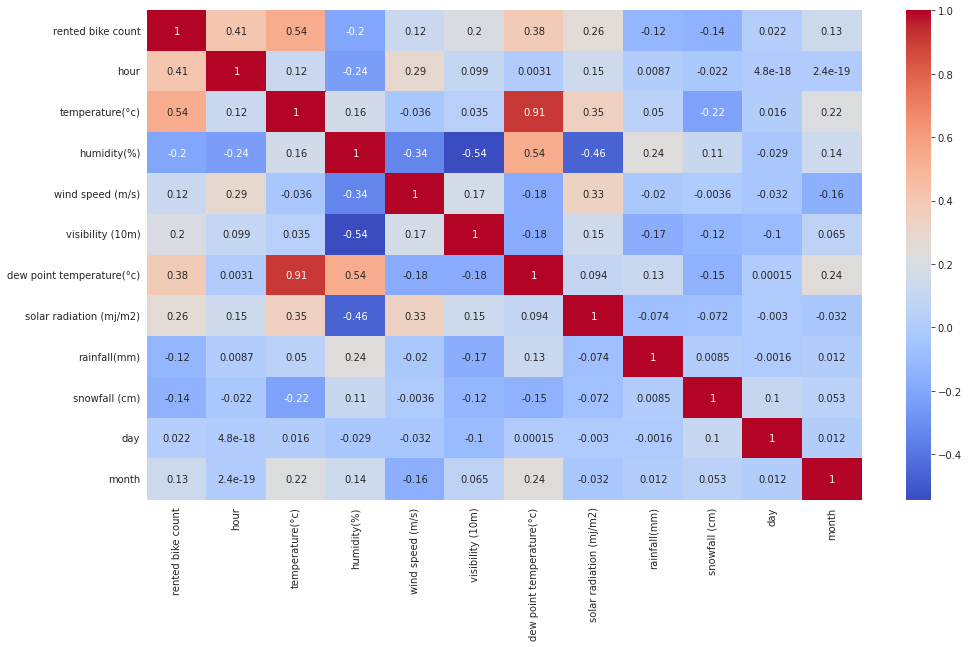

In [ ]:
corr_df= bike_df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr_df, annot=True, cmap= 'coolwarm');

The most correlated features to the rented bike count are:
* hour
* temperature(°c)
* dew point temperature(°c)
* solar radiation (mj/m2)

There is a high correlation between dew point temperature(°c) and temperature(°c).

### **Detecting Multicollinearity using VIF**

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [ ]:
calc_vif(bike_df[[i for i in num_variables]])

variables        VIF
0                        hour   4.425960
1             temperature(°c)  38.389623
2                 humidity(%)   8.344305
3            wind speed (m/s)   4.879565
4            visibility (10m)   9.481423
5   dew point temperature(°c)  19.815223
6     solar radiation (mj/m2)   2.900819
7                rainfall(mm)   1.082134
8               snowfall (cm)   1.144168
9                         day   4.292003
10                      month   5.096115

We can see here that 'dew point temperature(°c)', 'temperature(°c)' have a high VIF value, meaning they can be predicted by other independent variables in the dataset.

Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features.

In [ ]:
# droping 'dew point temperature(°c)', 'year', 'day', 'month'
calc_vif(bike_df[[i for i in num_variables if i not in ['dew point temperature(°c)', 'day', 'month']]])

variables       VIF
0                     hour  3.921832
1          temperature(°c)  3.228318
2              humidity(%)  4.868221
3         wind speed (m/s)  4.608625
4         visibility (10m)  4.710170
5  solar radiation (mj/m2)  2.246791
6             rainfall(mm)  1.079158
7            snowfall (cm)  1.120579

After droping 'dew point temperature(°c)', 'year', 'day' and 'month', VIF values for all features have decreased less than 5 that is good to build regression model.

In [ ]:
# droping 'dew point temperature(°c)', 'year', 'day', 'month' from original dataset
dataset= bike_df.drop(['dew point temperature(°c)', 'day', 'month'], axis=1)

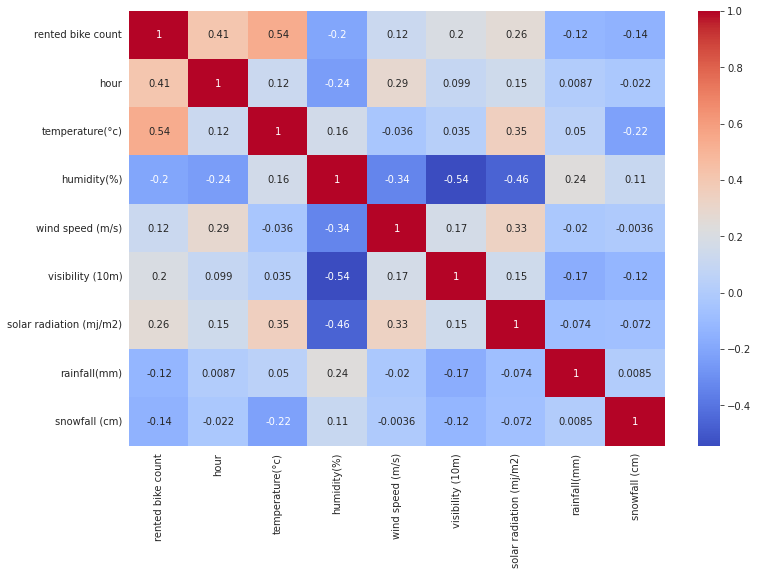

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap= 'coolwarm');

## **Feature Engineering**




In [ ]:
# creating column of weekend or not
dataset['weekend']= dataset['day_of_week'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
dataset.drop('day_of_week', axis=1, inplace=True)

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()

dataset[['seasons','holiday','functioning day']] = dataset[['seasons','holiday','functioning day']].apply(label_en.fit_transform)

In [ ]:
dataset.head()

rented bike count  hour  temperature(°c)  ...  holiday  functioning day  weekend
0                254     0             -5.2  ...        1                1        0
1                204     1             -5.5  ...        1                1        0
2                173     2             -6.0  ...        1                1        0
3                107     3             -6.2  ...        1                1        0
4                 78     4             -6.0  ...        1                1        0

[5 rows x 13 columns]

### **Train Test split**

In [ ]:
X= dataset.drop(dependent_var, axis=1)
y= np.sqrt(dataset[dependent_var])

In [ ]:
X.head()

hour  temperature(°c)  humidity(%)  ...  holiday  functioning day  weekend
0     0             -5.2           37  ...        1                1        0
1     1             -5.5           38  ...        1                1        0
2     2             -6.0           39  ...        1                1        0
3     3             -6.2           40  ...        1                1        0
4     4             -6.0           36  ...        1                1        0

[5 rows x 12 columns]

In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: rented bike count, dtype: float64

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
print(X_train.shape, y_train.shape)

(6132, 12) (6132,)


In [ ]:
print(X_test.shape, y_test.shape)

(2628, 12) (2628,)


# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# create an instance of linear regression
lin_reg = LinearRegression()

# fitting Linear Regression model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# model score
lin_reg.score(X_train, y_train)

0.6540967727241054

In [ ]:
lin_reg.coef_

array([ 4.78038514e-01,  5.56795645e-01, -1.57744402e-01,  4.32489954e-02,
        4.02047244e-04, -9.92946769e-01, -1.53370616e+00,  1.57364803e-01,
       -2.13910221e+00,  3.42660904e+00,  2.88459521e+01, -1.45660899e+00])

In [ ]:
lin_reg.intercept_

-7.367857457543842

In [ ]:
# predictions on train and test data
train_pred_lr= lin_reg.predict(X_train)
test_pred_lr= lin_reg.predict(X_test)

### **Evaluation Metrics**

Creating funtion to calculate evaluation metrics

In [ ]:
# create train and test result dictionaries
train_result={}
test_result= {}

def evaluation_metrics(y_true, y_pred, model=None, train=True):

  ''' takes actual target values and estimated target values as input
      and returns evaluation metrics as output '''

  MSE  = mean_squared_error(y_true, y_pred)
  print("MSE :" , MSE)
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)
  MAE= mean_absolute_error(y_true, y_pred)
  print("MAE :",MAE)
  print(" ")
  r2 = r2_score(y_true, y_pred)
  print("R2 :" ,r2)
  adj_r2 = 1-(1-r2_score(y_true, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  # appending result into dictionary
  if train:
    train_result[model]= [MSE,RMSE,MAE,r2,adj_r2]
  else:
    test_result[model]= [MSE,RMSE,MAE,r2,adj_r2]


In [ ]:
# Train data evaluation metrics
evaluation_metrics(y_train, train_pred_lr, model='Linear',train=True)

MSE : 53.80611459663623
RMSE : 7.335265134719823
MAE : 5.63805172995284
 
R2 : 0.6540967727241054
Adjusted R2 :  0.65250945389913


In [ ]:
# Test data evaluation metrics
evaluation_metrics(y_test, test_pred_lr, model='Linear',train=False)

MSE : 53.740491144516426
RMSE : 7.330790622062291
MAE : 5.661287586240897
 
R2 : 0.6501226505752834
Adjusted R2 :  0.6485170948609061


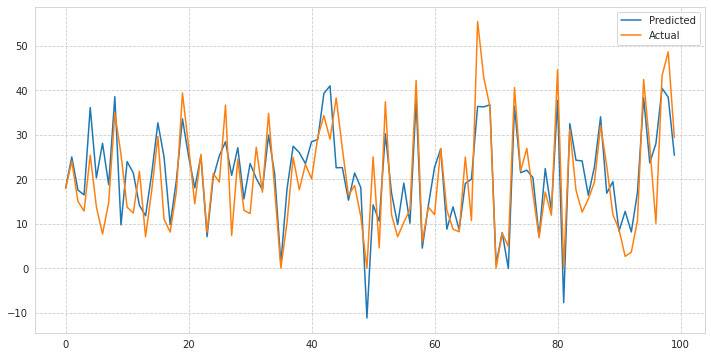

In [ ]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_lr[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

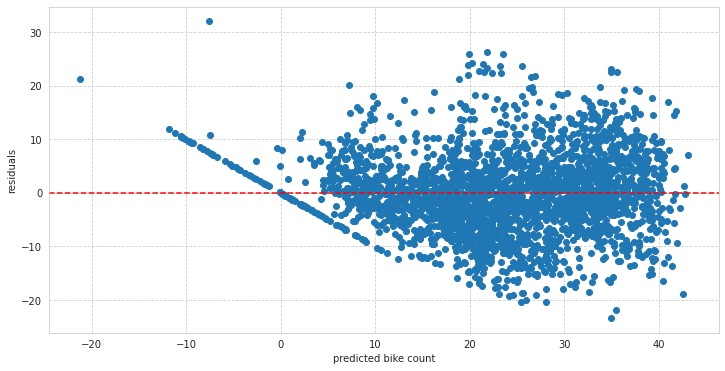

In [ ]:
#Heteroskedasticity
plt.figure(figsize=(12,6))
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.scatter(test_pred_lr, y_test- test_pred_lr)
plt.xlabel('predicted bike count')
plt.ylabel('residuals');

# **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# Cross validation
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]})

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.0001}


In [ ]:
# predictions on train and test dataset
train_pred_lasso = lasso_regressor.predict(X_train)
test_pred_lasso= lasso_regressor.predict(X_test)

### **Evaluation Metrics**

In [ ]:
# Train data evaluation metrics
evaluation_metrics(y_train, train_pred_lasso, 'Lasso', train=True)

MSE : 53.80611534623119
RMSE : 7.3352651858151106
MAE : 5.63804777968967
 
R2 : 0.6540967679051862
Adjusted R2 :  0.6525094490580972


In [ ]:
# Test data evaluation metrics
evaluation_metrics(y_test, test_pred_lasso, 'Lasso', train=False)

MSE : 53.74016699398597
RMSE : 7.330768513190549
MAE : 5.661284867852185
 
R2 : 0.6501247609565992
Adjusted R2 :  0.6485192149265722


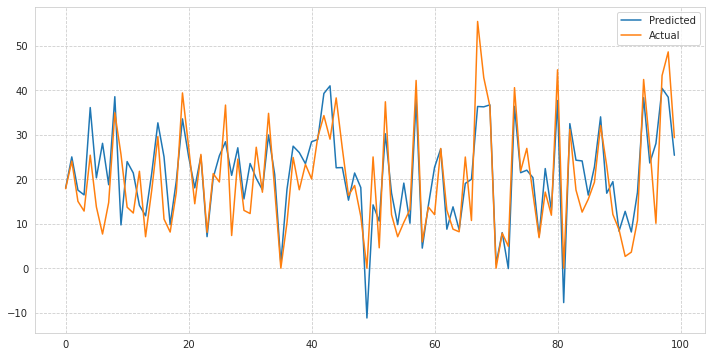

In [ ]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_lasso[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

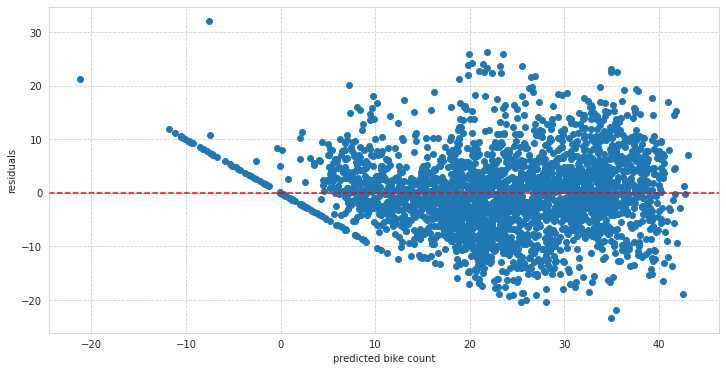

In [ ]:
# Heteroskedasticity
plt.figure(figsize=(12,6))
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.scatter(test_pred_lasso, y_test- test_pred_lasso)
plt.xlabel('predicted bike count')
plt.ylabel('residuals');

# **Ridge regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# cross validation
param_ridge = {'alpha': [1e-10,1e-5,1e-4,1e-3,1e-2,0.5,1,1.5,5,10,20,30,35,40,45,50,55,60,100]}
ridge_reg = GridSearchCV(ridge, param_ridge, cv=5)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-05, 0.0001, 0.001, 0.01, 0.5, 1,
                                   1.5, 5, 10, 20, 30, 35, 40, 45, 50, 55, 60,
                                   100]})

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)

The best fit alpha value is found out to be : {'alpha': 1e-10}


In [ ]:
# predictions on train and test dataset
train_pred_ridge = ridge_reg.predict(X_train)
test_pred_ridge= ridge_reg.predict(X_test)

### **Evaluation Metrics**

In [ ]:
# Train data evaluation metrics
evaluation_metrics(y_train, train_pred_ridge, 'Ridge', train=True)

MSE : 53.80611459663623
RMSE : 7.335265134719823
MAE : 5.638051729952847
 
R2 : 0.6540967727241054
Adjusted R2 :  0.65250945389913


In [ ]:
# Test data evaluation metrics
evaluation_metrics(y_test, test_pred_ridge, 'Ridge', train=False)

MSE : 53.74049114451563
RMSE : 7.330790622062237
MAE : 5.661287586240932
 
R2 : 0.6501226505752886
Adjusted R2 :  0.6485170948609114


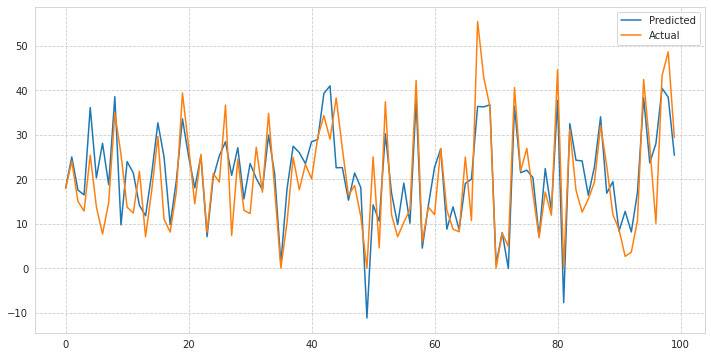

In [ ]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_ridge[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

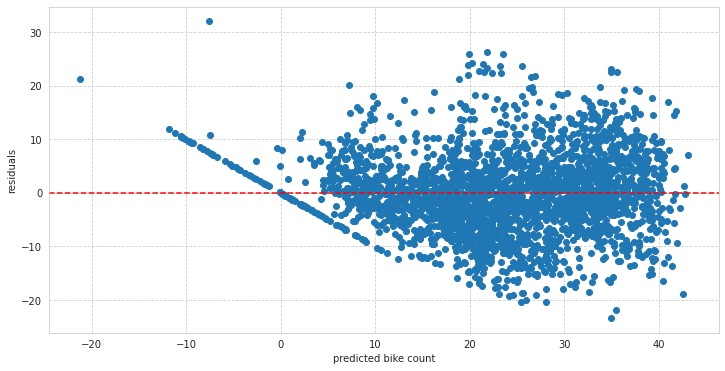

In [ ]:
# Heteroskedasticity
plt.figure(figsize=(12,6))
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.scatter(test_pred_ridge, y_test- test_pred_ridge)
plt.xlabel('predicted bike count')
plt.ylabel('residuals');

# **Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

# parameters
en_param = {'alpha': [1e-15,1e-10,1e-5,1e-3,1e-2,1e-1,1,5,10,20,30,40,50,100],
              'l1_ratio':[0.1,0.2,0.3,0.4,0.5]
              }

en_grid= GridSearchCV(elasticnet, en_param, cv= 5)
en_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 50, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [ ]:
en_grid.best_params_

{'alpha': 1e-15, 'l1_ratio': 0.2}

In [ ]:
en_model= en_grid.best_estimator_

In [ ]:
# predictions on train and test data
train_pred_en= en_model.predict(X_train)
test_pred_en= en_model.predict(X_test)

### **Evaluation Metrics**

In [ ]:
# Train data evaluation metrics
evaluation_metrics(y_train, train_pred_en, 'Elastic net', train=True)

MSE : 53.80611459663623
RMSE : 7.335265134719823
MAE : 5.638051729952843
 
R2 : 0.6540967727241054
Adjusted R2 :  0.65250945389913


In [ ]:
# Test data evaluation metrics
evaluation_metrics(y_test, test_pred_en, 'Elastic net', train=False)

MSE : 53.740491144516405
RMSE : 7.330790622062289
MAE : 5.661287586240901
 
R2 : 0.6501226505752835
Adjusted R2 :  0.6485170948609063


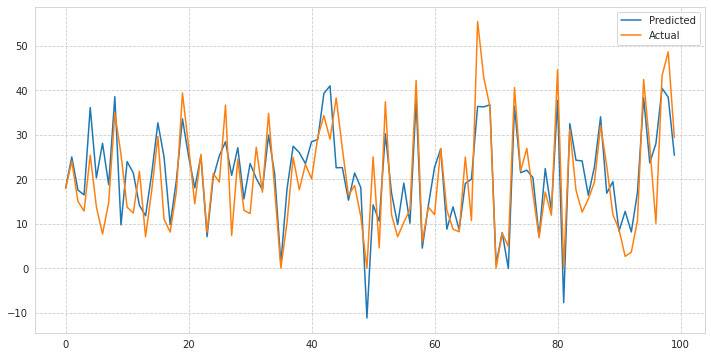

In [ ]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_en[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

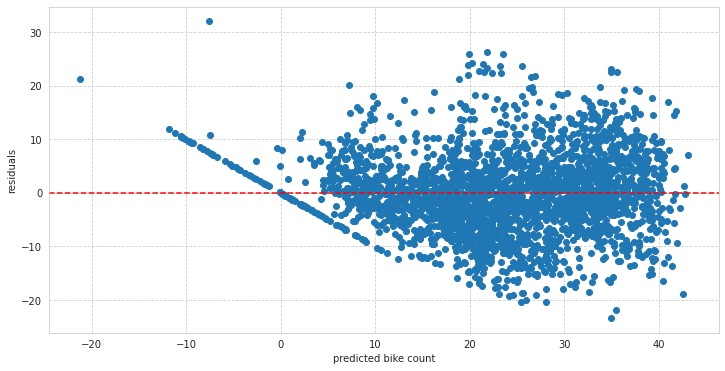

In [ ]:
# Heteroskedasticity
plt.figure(figsize=(12,6))
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.scatter(test_pred_en, y_test- test_pred_en)
plt.xlabel('predicted bike count')
plt.ylabel('residuals');

## **DecisionTree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Hyperparameter grid 
dt_params = {"criterion": ["mse", "mae"],
             "max_depth": [5, 6, 7, 8],
             "min_samples_split": [10, 20, 40],
             "min_samples_leaf": [20, 40, 100]
              }

In [ ]:
# create an instance of DecisionTreeRegressor
dt_reg= DecisionTreeRegressor()

# GridSearch
dt_grid= GridSearchCV(estimator = dt_reg, param_grid = dt_params, cv = 5, verbose = 2)

dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_sample

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]},
             verbose=2)

In [ ]:
# best parameters
dt_grid.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [ ]:
dt_optimal_model= dt_grid.best_estimator_

In [ ]:
# Model score
dt_optimal_model.score(X_train, y_train)

0.8613754775424959

In [ ]:
# predictions on train and test data
train_pred_dt= dt_optimal_model.predict(X_train)
test_pred_dt= dt_optimal_model.predict(X_test)

### **Evaluation Metrics**

In [ ]:
# train data evaluation metrics
evaluation_metrics(y_train, train_pred_dt, 'Decision Tree', train=True)

MSE : 21.563392166050008
RMSE : 4.643639969468995
MAE : 3.218932170884279
 
R2 : 0.8613754775424959
Adjusted R2 :  0.8607393420665914


In [ ]:
# test data evaluation metrics
evaluation_metrics(y_test, test_pred_dt, 'Decision Tree', train=False)

MSE : 24.623417452837717
RMSE : 4.962198852609367
MAE : 3.4556336932227647
 
R2 : 0.8396892948185077
Adjusted R2 :  0.8389536433989369


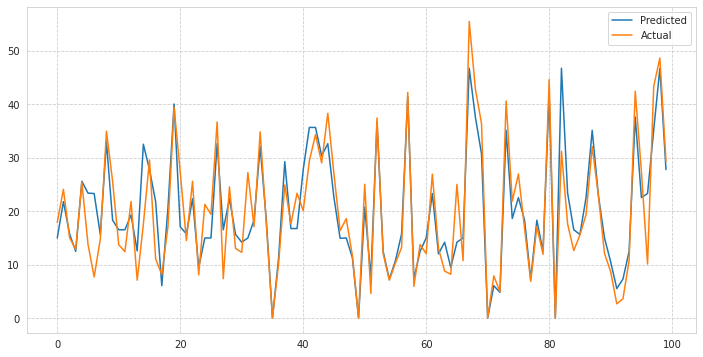

In [ ]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_dt[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

### **Feature Importance**

In [ ]:
dt_optimal_model.feature_importances_

array([2.28746482e-01, 2.83530983e-01, 1.69522561e-01, 1.29193582e-04,
       4.96484172e-04, 3.60891331e-02, 1.91378840e-02, 1.44827097e-04,
       8.74705656e-02, 9.23499803e-04, 1.65381557e-01, 8.42683001e-03])

Create function to plot feature importance

In [ ]:
def plot_feature_importance(model,X):

  ''' plots feature importance graph '''


  importances = list(model.feature_importances_)

  feature_importances= {'feature':list(X.columns), 'feature_importance':importances}

  importance_df= pd.DataFrame(feature_importances)
  importance_df.sort_values(by='feature_importance', ascending=False, inplace=True)

  plt.figure(figsize=(12,6))
  sns.barplot(x='feature_importance', y='feature', data=importance_df)
  
  plt.xlabel("Importance")
  plt.tight_layout()

  plt.show()

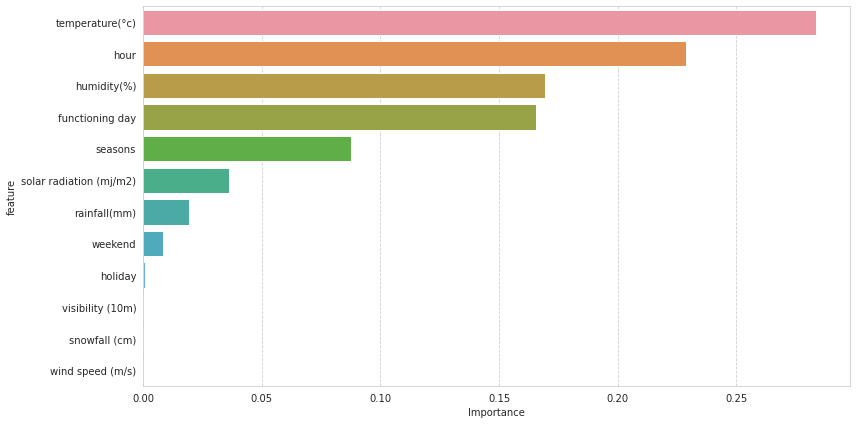

In [ ]:
plot_feature_importance(dt_optimal_model,X)

### **DecisionTree visualization**

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

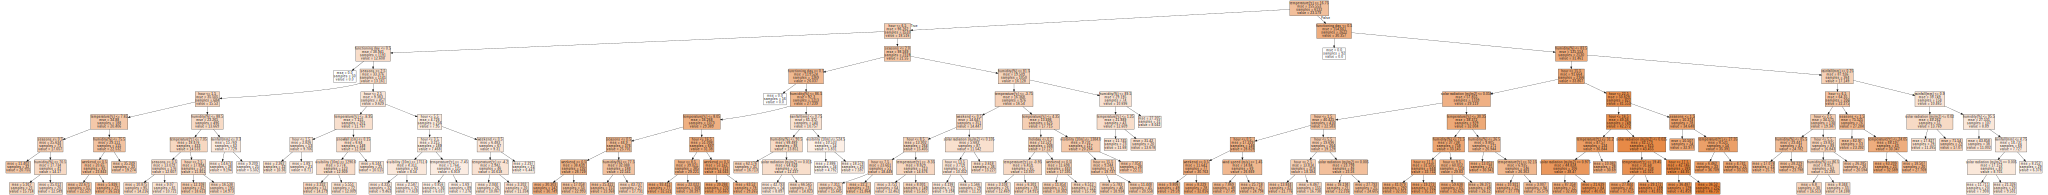

In [ ]:
dot_data = tree.export_graphviz(dt_optimal_model, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

# **Random Forest Regressor**

In [ ]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# hyperparameter grid
param_dict_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 6, 7, 8],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [40, 50]
  }

In [ ]:
# create regressor object
rf_model= RandomForestRegressor()

# fitting gridsearch
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict_rf,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [ ]:
# best parameters
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 100}

In [ ]:
# optimal model
rf_optimal_model= rf_grid.best_estimator_

In [ ]:
# Model score
rf_optimal_model.score(X_train,y_train)

0.8656427127684733

In [ ]:
# Making predictions on train and test data
train_pred_rf= rf_optimal_model.predict(X_train)
test_pred_rf= rf_optimal_model.predict(X_test)

### **Evaluation Metrics**

In [ ]:
# Train data Evaluation metrics
evaluation_metrics(y_train, train_pred_rf, 'Random Forest', train=True)

MSE : 20.899613023577274
RMSE : 4.5716094565893615
MAE : 3.285663006506399
 
R2 : 0.8656427127684733
Adjusted R2 :  0.8650261592515408


In [ ]:
# Test data Evaluation metrics
evaluation_metrics(y_test, test_pred_rf, 'Random Forest', train=False)

MSE : 23.884602958250195
RMSE : 4.887187632805824
MAE : 3.5010714074227365
 
R2 : 0.8444993449609174
Adjusted R2 :  0.8437857664291892


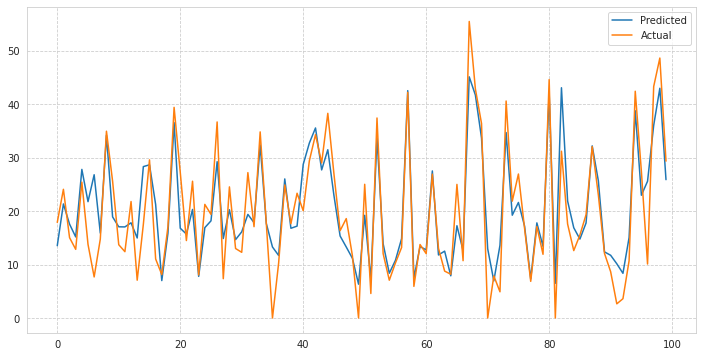

In [ ]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_rf[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

### **Feature Importances**

In [ ]:
rf_optimal_model.feature_importances_

array([0.26631945, 0.31068293, 0.11759505, 0.00046708, 0.00189592,
       0.02996582, 0.05064327, 0.00061912, 0.06420139, 0.00036813,
       0.15065048, 0.00659136])

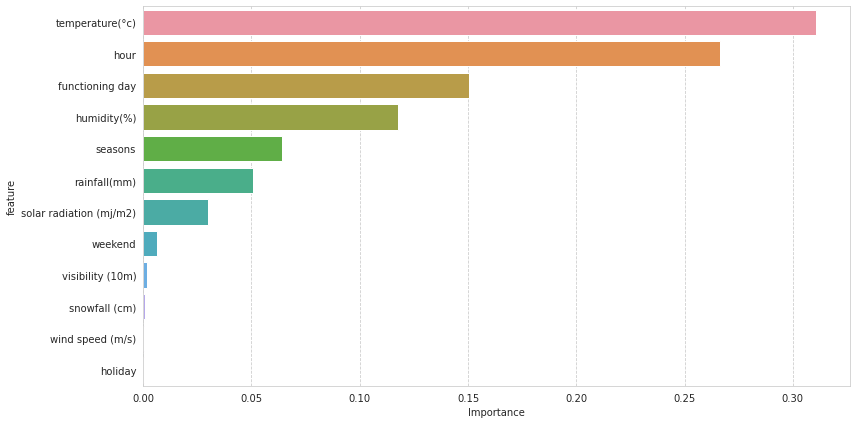

In [ ]:
plot_feature_importance(rf_optimal_model,X)

# **Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# HYperparameter Grid
param_gb = {'n_estimators' : [50, 100, 150],
              'max_depth' : [5, 6, 7, 8],
              'min_samples_split' : [50, 80],
              'min_samples_leaf' : [40, 50]}

In [ ]:
# Create an instance of the  GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_gb,
                       cv = 3, verbose=2, scoring='neg_mean_squared_error')

gb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.3s
[CV] END max_depth=5, m

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# best parameters
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 150}

In [ ]:
gb_optimal_model= gb_grid.best_estimator_

In [ ]:
# Model score
gb_optimal_model.score(X_train,y_train)

0.9683883120906536

In [ ]:
# Making predictions on train and test data
train_pred_gb= gb_optimal_model.predict(X_train)
test_pred_gb= gb_optimal_model.predict(X_test)

### **Evaluation metrics**

In [ ]:
# Train data evaluation metrics
evaluation_metrics(y_train,train_pred_gb, 'Gradient Boosting', train=True)

MSE : 4.917277342679263
RMSE : 2.217493481992509
MAE : 1.489668510485167
 
R2 : 0.9683883120906536
Adjusted R2 :  0.9682432488956585


In [ ]:
# Test data evaluation metrics
evaluation_metrics(y_test,test_pred_gb, 'Gradient Boosting', train=False)

MSE : 10.055938774957088
RMSE : 3.1711100225247764
MAE : 2.080606411248158
 
R2 : 0.9345308327179622
Adjusted R2 :  0.9342304005927674


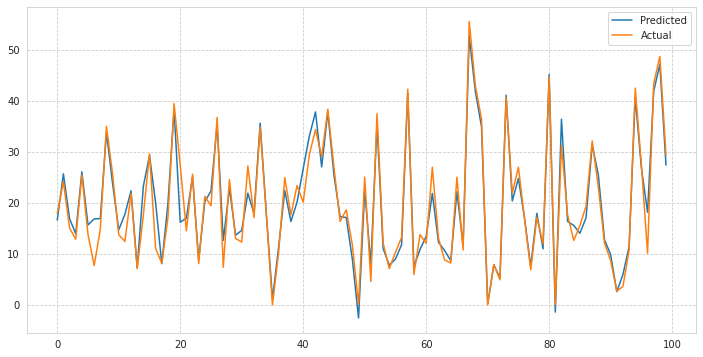

In [ ]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_gb[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

### **Feature Importance**

In [ ]:
gb_optimal_model.feature_importances_

array([0.25046469, 0.2791216 , 0.11811762, 0.00376981, 0.00677295,
       0.04117756, 0.05988008, 0.00104953, 0.06393035, 0.00214075,
       0.15376927, 0.01980578])

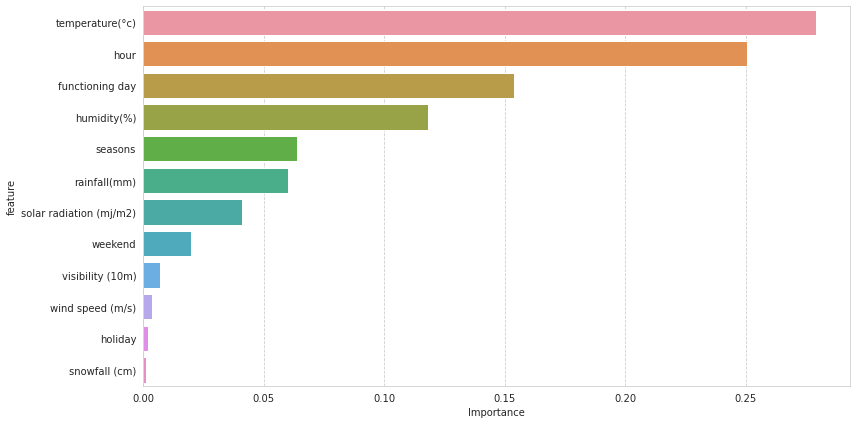

In [ ]:
plot_feature_importance(gb_optimal_model,X)

# **XG Boost Regressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
params_xgb= {'max_depth': [5,6,7,8],
             'learning_rate': [0.05, 0.1, 0.3],
             'n_estimators': [80,100,150],
             'colsample_bytree': [0.5,0.7]
             }

In [ ]:
# Creating an instance 
xgb_model = XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid = params_xgb,
                       cv = 3, scoring='neg_mean_squared_error', verbose=2)

xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[13:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=80; total time=   0.3s
[13:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=80; total time=   0.2s
[13:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=80; total time=   0.2s
[13:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.3s
[13:26:01] WARNING: /workspac

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': [5, 6, 7, 8],
                         'n_estimators': [80, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# best parameters
xgb_grid.best_params_

In [ ]:
xgb_optimal_model= xgb_grid.best_estimator_

In [ ]:
# Model score
xgb_optimal_model.score(X_train,y_train)

In [ ]:
# Making predictions on train and test data
train_pred_xgb= xgb_optimal_model.predict(X_train)
test_pred_xgb= xgb_optimal_model.predict(X_test)

### **Evaluation Metrics**

In [ ]:
# Train data evaluation metrics
evaluation_metrics(y_train, train_pred_xgb, 'XG Boost', train=True)

In [ ]:
# Test data evaluation metrics
evaluation_metrics(y_test, test_pred_xgb, 'XG Boost', train=False)

In [ ]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_xgb[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

### **Feature Importances**

In [ ]:
xgb_optimal_model.feature_importances_

In [ ]:
plot_feature_importance(xgb_optimal_model,X)

# **Test Results**

In [ ]:
train_results_df= pd.DataFrame(train_result).T.reset_index()
train_results_df.columns= ['Model', 'MSE', 'RMSE', 'MAE', 'R2 score', 'Adjusted R2']
train_results_df

Model        MSE      RMSE       MAE  R2 score  Adjusted R2
0             Linear  53.806115  7.335265  5.638052  0.654097     0.652509
1              Lasso  53.806115  7.335265  5.638048  0.654097     0.652509
2              Ridge  53.806115  7.335265  5.638052  0.654097     0.652509
3        Elastic net  53.806115  7.335265  5.638052  0.654097     0.652509
4      Decision Tree  21.563392  4.643640  3.218932  0.861375     0.860739
5      Random Forest  20.899613  4.571609  3.285663  0.865643     0.865026
6  Gradient Boosting   4.917277  2.217493  1.489669  0.968388     0.968243
7           XG Boost   2.945094  1.716128  1.157289  0.981067     0.980980

In [ ]:
test_results_df= pd.DataFrame(test_result).T.reset_index()
test_results_df.columns= ['Model', 'MSE', 'RMSE', 'MAE', 'R2 score', 'Adjusted R2']
test_results_df

Model        MSE      RMSE       MAE  R2 score  Adjusted R2
0             Linear  53.740491  7.330791  5.661288  0.650123     0.648517
1              Lasso  53.740167  7.330769  5.661285  0.650125     0.648519
2              Ridge  53.740491  7.330791  5.661288  0.650123     0.648517
3        Elastic net  53.740491  7.330791  5.661288  0.650123     0.648517
4      Decision Tree  24.623417  4.962199  3.455634  0.839689     0.838954
5      Random Forest  23.884603  4.887188  3.501071  0.844499     0.843786
6  Gradient Boosting  10.055939  3.171110  2.080606  0.934531     0.934230
7           XG Boost   9.461326  3.075927  2.034954  0.938402     0.938119

In [ ]:
sns.set_context('paper')

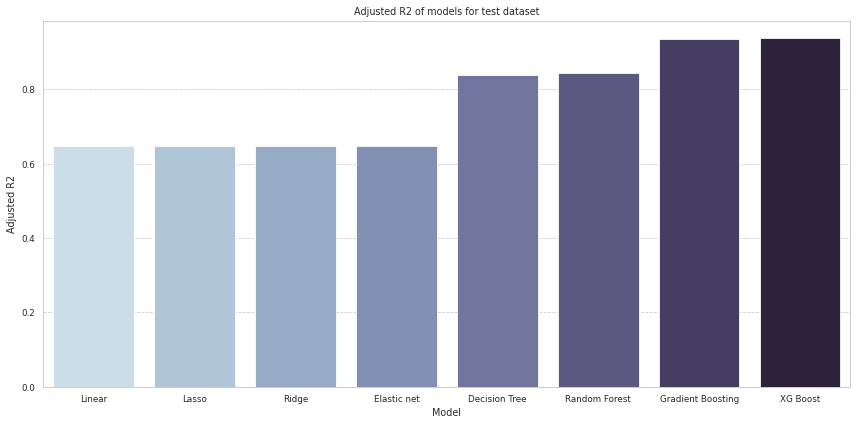

In [ ]:
# plot Adjusted R2 of models for test dataset
plt.figure(figsize=(12,6))
sns.barplot(x='Model',y='Adjusted R2', data=test_results_df, palette="ch:s=.25,rot=-.25")
plt.title("Adjusted R2 of models for test dataset")

plt.tight_layout();

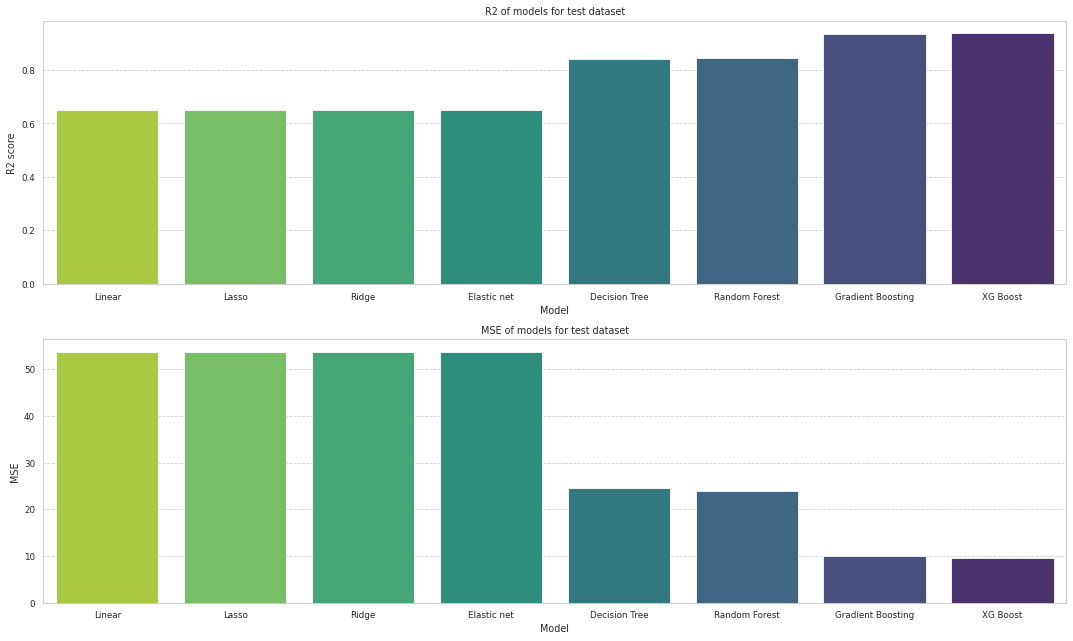

In [ ]:
# plot R2 and MSE of models for test dataset
fig, ax = plt.subplots(2,figsize=(15,9))
sns.barplot(x='Model',y='R2 score', data=test_results_df, palette="viridis_r", ax= ax[0])
ax[0].set_title("R2 of models for test dataset")

sns.barplot(x='Model',y='MSE', data=test_results_df, palette="viridis_r", ax= ax[1])
ax[1].set_title("MSE of models for test dataset")

plt.tight_layout()
plt.show()

### **XGBoost model is found to be the best model.**

# **Model Explainability**

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 8.6 MB/s 


In [ ]:
from sklearn.tree import export_graphviz
import shap 
import graphviz
sns.set_style('darkgrid') 

## **Shap for XGBoost**

In [ ]:
observation_1 = 2

In [ ]:
# individual SHAP value plot for observation 2 of train dataset
shap.initjs()

explainer = shap.TreeExplainer(xgb_optimal_model)
shap_values = explainer.shap_values(X_train)

shap.force_plot(explainer.expected_value, shap_values[observation_1], features=X_train.iloc[observation_1], feature_names=X_train.columns)

The output value is the prediction for that observation. Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

Temperature has a positive impact on the rented bike count as it pushes it towards right.

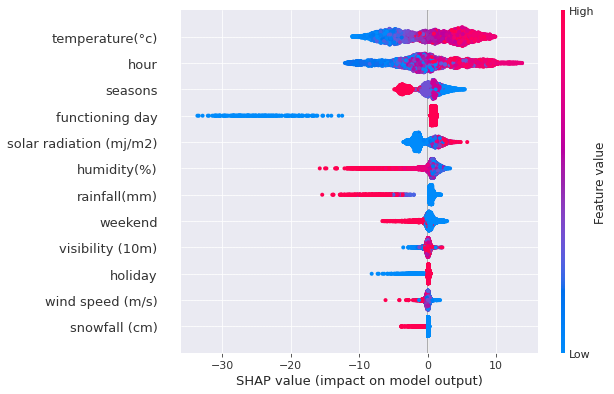

In [ ]:
shap.summary_plot(shap_values, X_train)

This plot is made of all the dots un the train data. Variables are ranked in descending order. Color shows whether that variable is high or low for that observation.

A high level of temperature and hour has positive impact on the count of rental bikes. So, we can say that temperature and hour are most influential features for predicting bike count.

# **Conclusion**

Some of the facts that we can conclude from this data are:
* There is a huge demand for bike rents in the summer season while the least bike rents occur in winter.
* The demand for rental bikes is at peak at 8am and 6pm so we can say that demand is more during office opening and closing time.
* Non holidays have comparatively high demand for rented bikes as compared to holidays.
* Temperature and hour are the most influential features to predict the rental bike count.

The result shows the evaluation metrics- R-squared, Adjusted R2 showed highest value and MSE, RMSE showed lowest value for XGBoost model. Gradient Boosting and XGBoost models are found to be the best models. Therefore, either Gradient Boosting or XGBoost model can be used to predict the number of bikes required at each hour.
